In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv("A:/August Infotech/SEM-8/stage 6/DataCoSupplyChainDataset.csv", encoding='latin-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Data cleaning

In [55]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [56]:
# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [57]:
df=df.drop(['Customer Email','Customer Fname','Customer Password','Customer Lname','Customer Street','Customer Zipcode','Order Zipcode','Product Description','Product Image','Product Status','shipping date (DateOrders)','Longitude','Latitude'],axis=1)



In [58]:
df.shape

(180519, 41)

In [59]:
df.duplicated().sum()

0

In [60]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_mode', 'customer_full_name'],
      dtype='object')

In [61]:
Delivery=df.groupby('delivery_status')
Market = df.groupby('market') 
Region = df.groupby('order_region')
Customer=df.groupby('customer_segment')
Category=df.groupby('category_name')
Shipping=df.groupby('shipping_mode')
Region=df.groupby('order_region')

###### Here we will analyse relation between 41 columns to identify duplicate columns.

<AxesSubplot:>

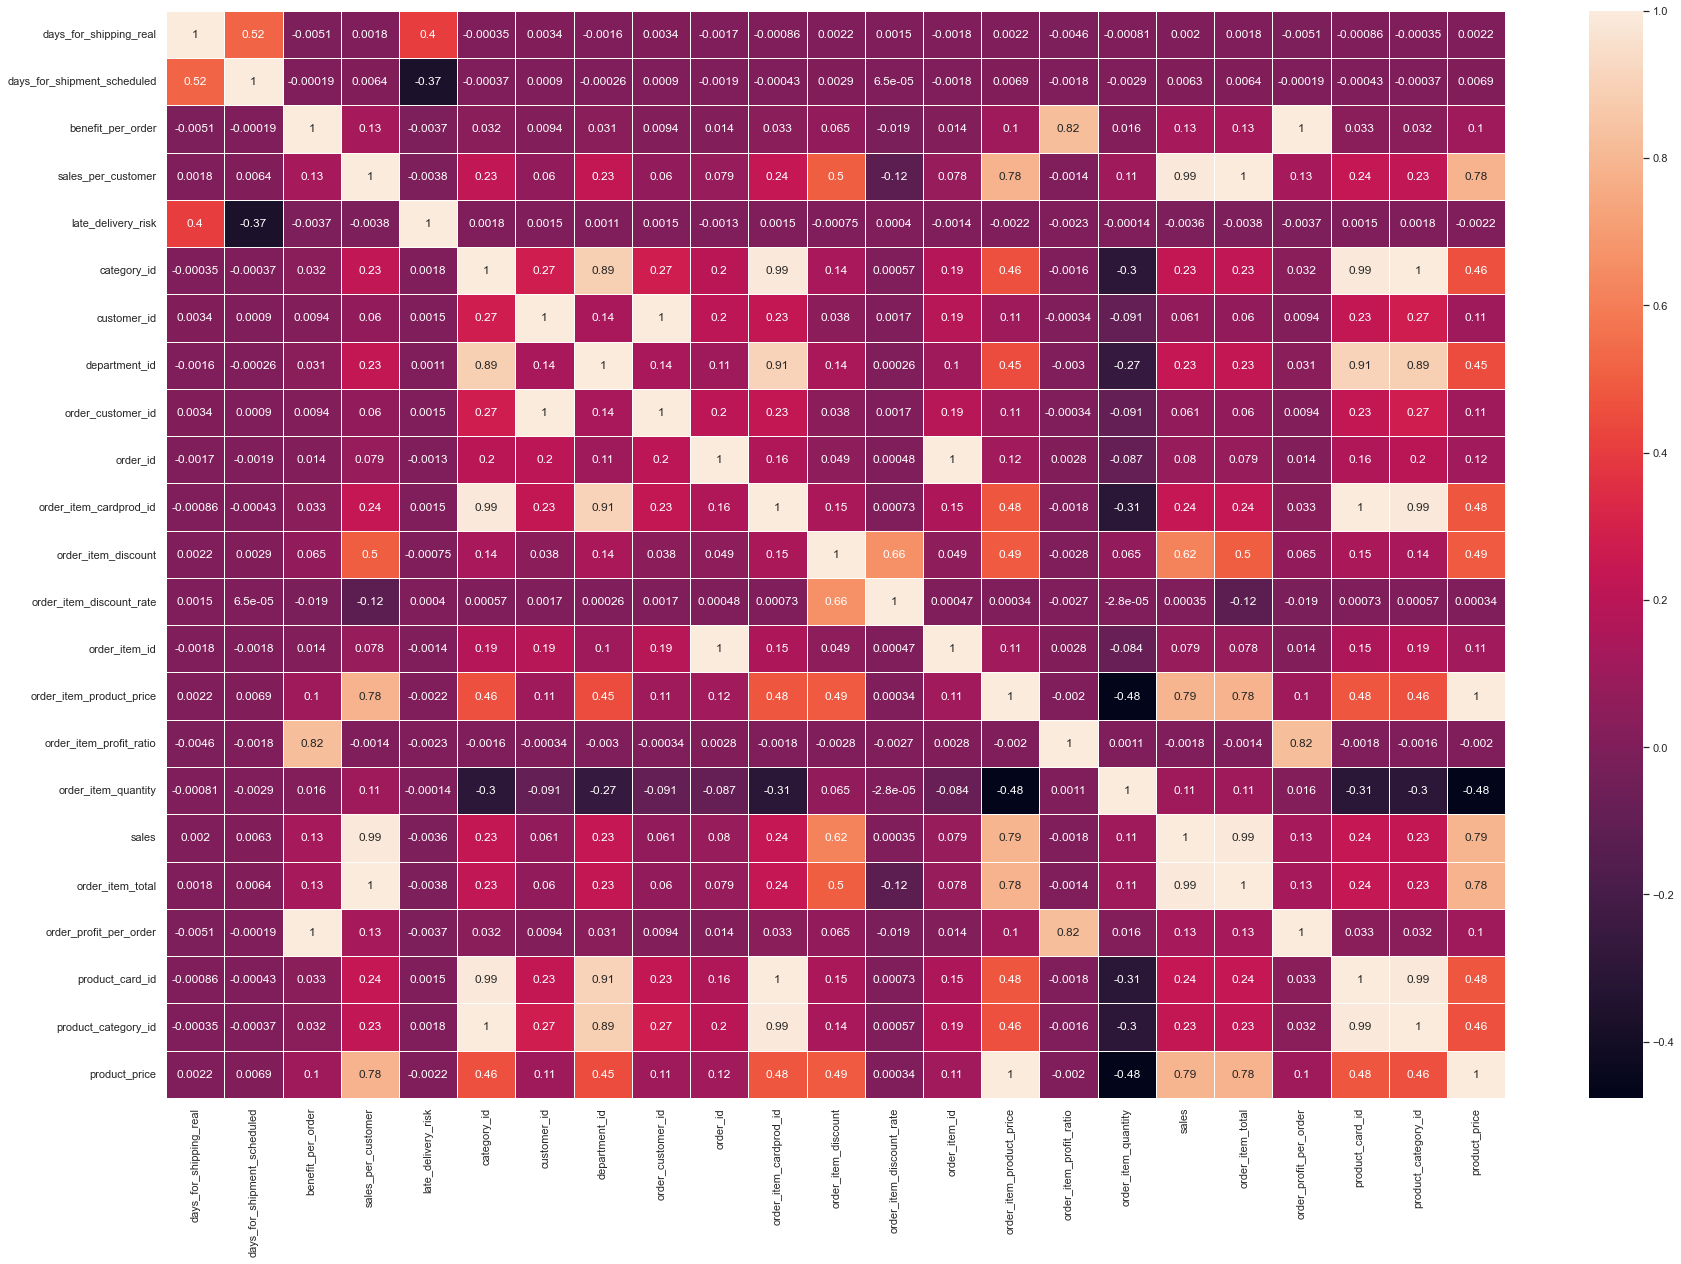

In [62]:
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [63]:
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_mode', 'customer_full_name'],
      dtype='object')

In [64]:
# After analysing, I get to know that i need to remove some duplicate columns.


df=df.drop(['order_item_id','order_customer_id','category_id','order_item_cardprod_id','sales_per_customer','order_item_total','order_profit_per_order'],axis=1)

## Risk Management - Delivery 

Delivery Status Summary:
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: delivery_status, dtype: int64


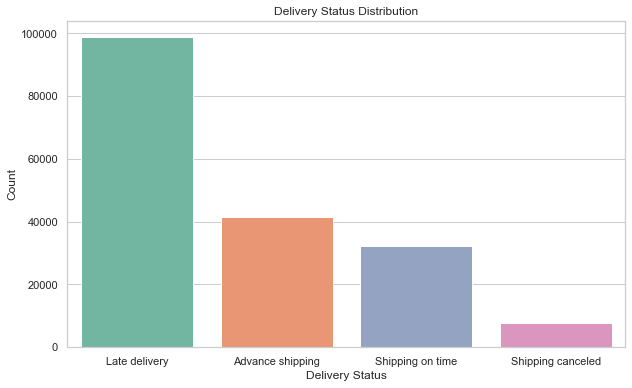

In [65]:
delivery_status_data = df['delivery_status']

# Summary Statistics
delivery_status_summary = delivery_status_data.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x='delivery_status', order=delivery_status_summary.index, palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

# Display summary statistics
print("Delivery Status Summary:")
print(delivery_status_summary)

In [66]:
df[(df['delivery_status']=='Late delivery')& (df['late_delivery_risk']==0)]


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_id,...,sales,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_mode,customer_full_name


In [67]:
df[(df['delivery_status']=='Late delivery')& (df['late_delivery_risk']==1)]


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_id,...,sales,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_mode,customer_full_name
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,...,327.750000,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,Standard Class,IreneLuna
6,DEBIT,2,1,95.180000,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19487,...,327.750000,Eastern Asia,Guangdong,COMPLETE,1360,73,Smart watch,327.750000,First Class,ConstanceTerrell
7,TRANSFER,2,1,68.430000,Late delivery,1,Sporting Goods,Miami,EE. UU.,19486,...,327.750000,Eastern Asia,Guangdong,PROCESSING,1360,73,Smart watch,327.750000,First Class,EricaStevens
8,CASH,3,2,133.720001,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19485,...,327.750000,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.750000,Second Class,NicholeOlsen
9,CASH,2,1,132.149994,Late delivery,1,Sporting Goods,San Ramon,EE. UU.,19484,...,327.750000,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.750000,First Class,OprahDelacruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180507,PAYMENT,5,2,50.110001,Late delivery,1,Fishing,Philadelphia,EE. UU.,8247,...,399.980011,Southeast Asia,Th? Dô Hà N?i,PAYMENT_REVIEW,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,MarySmith
180508,DEBIT,4,2,85.000000,Late delivery,1,Fishing,Waipahu,EE. UU.,8387,...,399.980011,Eastern Asia,Hubei,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,RichardFuentes
180512,DEBIT,6,4,86.400002,Late delivery,1,Fishing,Caguas,Puerto Rico,7396,...,399.980011,Eastern Asia,Sichuan,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MaryMadden
180515,DEBIT,3,2,-613.770019,Late delivery,1,Fishing,Bakersfield,EE. UU.,9141,...,399.980011,Eastern Asia,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,RonaldClark


In [68]:
df['late_delivery']=np.where(df['delivery_status']=='Late delivery',1,0)
df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_id,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks,0


##### Fraud analysis

In [69]:
df[df['order_status']=='SUSPECTED_FRAUD']

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_id,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_mode,customer_full_name,late_delivery
10,TRANSFER,6,2,130.580002,Shipping canceled,0,Sporting Goods,Caguas,Puerto Rico,19483,...,Eastern Asia,Tokio,SUSPECTED_FRAUD,1360,73,Smart watch,327.750000,Second Class,GermaneShort,0
24,TRANSFER,2,2,90.279999,Shipping canceled,0,Sporting Goods,Billings,EE. UU.,19469,...,Oceania,Queensland,SUSPECTED_FRAUD,1360,73,Smart watch,327.750000,Second Class,SimoneVance,0
183,TRANSFER,5,4,28.850000,Shipping canceled,0,Electronics,Freeport,EE. UU.,1509,...,US Center,Texas,SUSPECTED_FRAUD,278,13,Under Armour Men's Compression EV SL Slide,44.990002,Standard Class,PatriciaPetersen,0
184,TRANSFER,5,4,133.910004,Shipping canceled,0,Cardio Equipment,Fort Washington,EE. UU.,1636,...,West of USA,Arizona,SUSPECTED_FRAUD,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,Standard Class,JuliePetersen,0
185,TRANSFER,6,4,79.160004,Shipping canceled,0,Cardio Equipment,Bakersfield,EE. UU.,2784,...,West of USA,California,SUSPECTED_FRAUD,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,Standard Class,LisaSmith,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180274,TRANSFER,5,2,163.190002,Shipping canceled,0,Fishing,Caguas,Puerto Rico,3830,...,Eastern Asia,Oita,SUSPECTED_FRAUD,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,WilliamSmith,0
180309,TRANSFER,2,1,114.830002,Shipping canceled,0,Fishing,Modesto,EE. UU.,467,...,Eastern Asia,Liaoning,SUSPECTED_FRAUD,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,First Class,JamesSmith,0
180352,TRANSFER,4,4,90.000000,Shipping canceled,0,Fishing,Albuquerque,EE. UU.,6899,...,Southeast Asia,Yogyakarta,SUSPECTED_FRAUD,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MarySmith,0
180406,TRANSFER,6,4,-333.179993,Shipping canceled,0,Fishing,Caguas,Puerto Rico,9749,...,South Asia,Bihar,SUSPECTED_FRAUD,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,AnthonyMcguire,0


<AxesSubplot:>

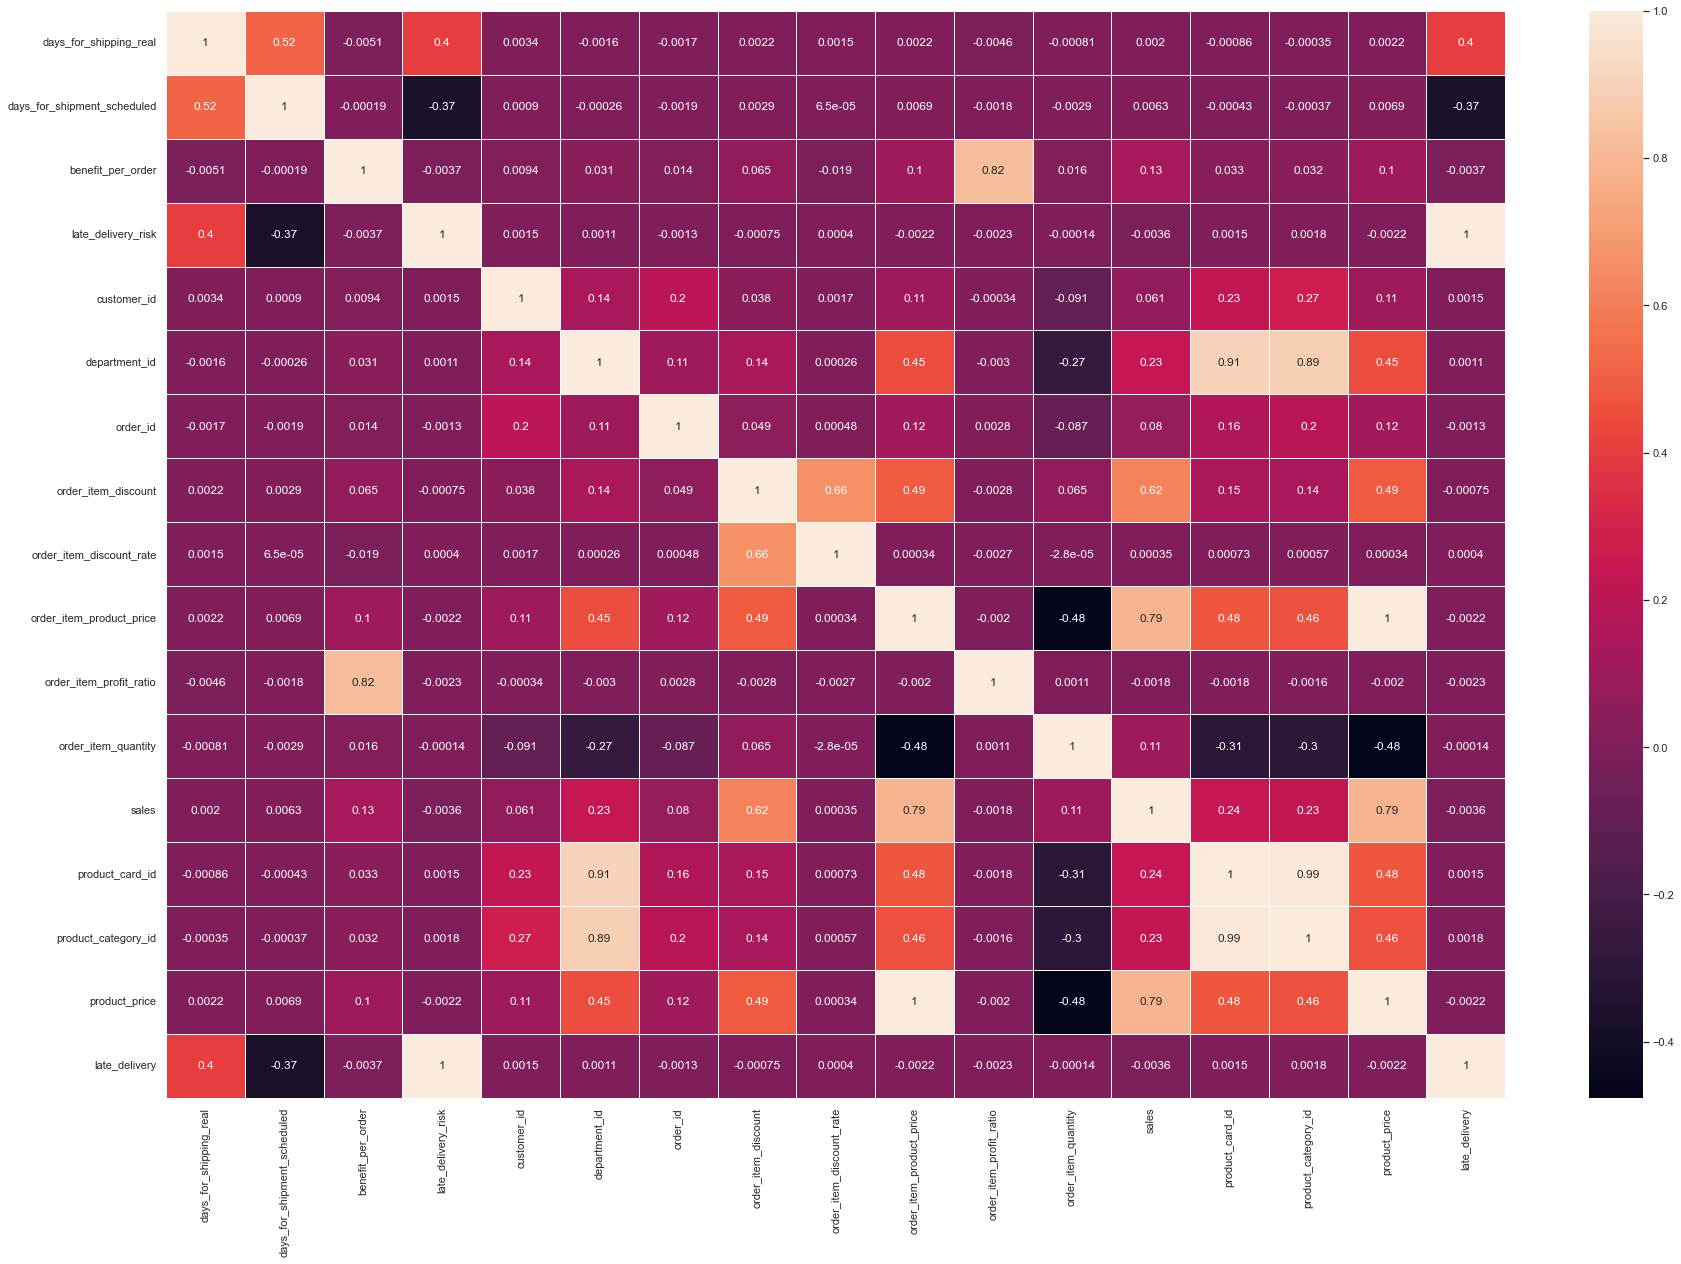

In [70]:
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [71]:
df['fraud']=np.where(df['order_status']=='SUSPECTED_FRAUD',1,0)

In [72]:
df.drop(['days_for_shipping_real','delivery_status','late_delivery_risk','order_city','order_date_dateorders'],axis=1,inplace=True)

In [73]:
df.columns

Index(['type', 'days_for_shipment_scheduled', 'benefit_per_order',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'market', 'order_country', 'order_id',
       'order_item_discount', 'order_item_discount_rate',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_region', 'order_state',
       'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_mode', 'customer_full_name',
       'late_delivery', 'fraud'],
      dtype='object')

In [74]:
df.drop(['order_item_product_price','product_card_id','customer_full_name'],axis=1,inplace=True)

#### Modeling

In [75]:
le=LabelEncoder()

obj_num=['type','category_name','customer_city','customer_country','customer_segment','customer_state',
         'department_name','market','order_country','order_region','order_status',
        'order_state','product_name','shipping_mode']
for i in obj_num:
    df[i]  = le.fit_transform(df[i])

In [76]:
fraud_x=df.drop(['fraud','late_delivery'],axis=1)
fraud_y=df['fraud']

In [77]:
late_x=df.drop(['fraud','late_delivery'],axis=1)
late_y=df['late_delivery']

In [78]:
fraud_x_train,fraud_x_test,fraud_y_train,fraud_y_test=train_test_split(fraud_x,fraud_y,test_size=0.2)
late_x_train,late_x_test,late_y_train,late_y_test=train_test_split(late_x,late_y,test_size=0.2)

In [79]:
df.columns

Index(['type', 'days_for_shipment_scheduled', 'benefit_per_order',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'market', 'order_country', 'order_id',
       'order_item_discount', 'order_item_discount_rate',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_region', 'order_state', 'order_status', 'product_category_id',
       'product_name', 'product_price', 'shipping_mode', 'late_delivery',
       'fraud'],
      dtype='object')

## Logistic Regression
#### Model traning for fraud detection

In [27]:
lrf=LogisticRegression(max_iter=2000)
lrf.fit(fraud_x_train,fraud_y_train)
lrf.score(fraud_x_test,fraud_y_test)

C:\Users\yachi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9753212940394416

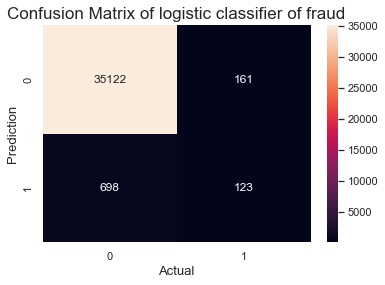

In [73]:
fraud_y_pred = lrf.predict(fraud_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(fraud_y_test,fraud_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of logistic classifier of fraud',fontsize=17)
plt.show()

#####  Model traning for Late delivery 

In [74]:
lrl=LogisticRegression(max_iter=1000)
lrl.fit(late_x_train,late_y_train)
lrl.score(late_x_test,late_y_test)

C:\Users\yachi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6720031021493463

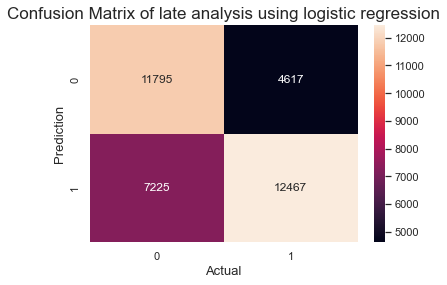

In [75]:
late_y_pred = lrl.predict(late_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(late_y_test,late_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of late analysis using logistic regression',fontsize=17)
plt.show()

## Decision Tree Classifier
##### for fraud analysis

In [76]:
dtrf=DecisionTreeClassifier()
dtrf.fit(fraud_x_train,fraud_y_train)
dtrf.score(fraud_x_test,fraud_y_test)


1.0

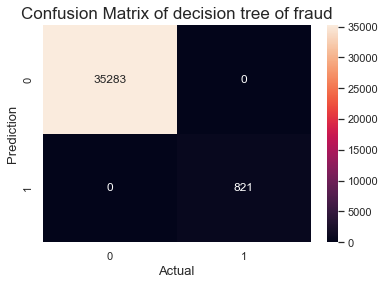

In [77]:
fraud_y_pred = dtrf.predict(fraud_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(fraud_y_test,fraud_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of decision tree of fraud',fontsize=17)
plt.show()

#### for late delivery analysis

In [78]:
dtrl=DecisionTreeClassifier()
dtrl.fit(late_x_train,late_y_train)
dtrl.score(late_x_test,late_y_test)

0.8557777531575449

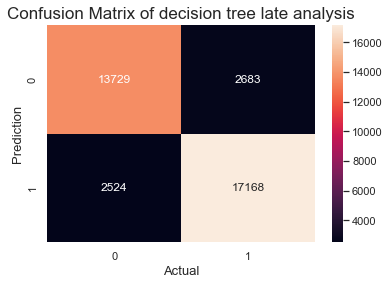

In [79]:
late_y_pred = dtrl.predict(late_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(late_y_test,late_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of decision tree late analysis',fontsize=17)
plt.show()

#### Random forest classifier

In [81]:
classifierf= RandomForestClassifier(n_estimators= 50, criterion="entropy",)  
classifierf.fit(fraud_x_train,fraud_y_train)
classifierf.score(fraud_x_test,fraud_y_test)*100

100.0

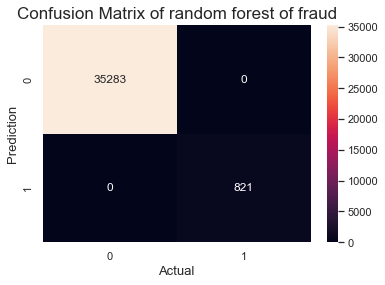

In [82]:
classifier_y_pred = classifierf.predict(fraud_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(fraud_y_test,fraud_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of random forest of fraud',fontsize=17)
plt.show()

In [83]:
classifierl= RandomForestClassifier(n_estimators= 50, criterion="entropy",)  
classifierl.fit(late_x_train,late_y_train)
classifierl.score(late_x_test,late_y_test)*100

77.75038776866829

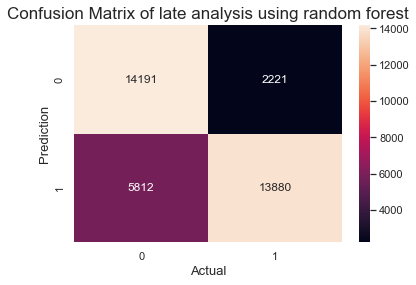

In [85]:
late_y_pred = classifierl.predict(late_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(late_y_test,late_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)`
plt.title('Confusion Matrix of late analysis using random forest',fontsize=17)
plt.show()

### Gaussian

In [89]:
modelf=GaussianNB()
modelf.fit(fraud_x_train,fraud_y_train)
modelf.score(fraud_x_test,fraud_y_test)

0.9992521604254376

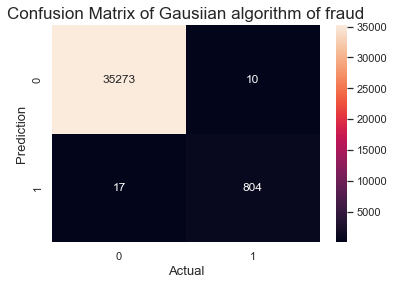

In [91]:
fraud_y_pred =modelf.predict(fraud_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(fraud_y_test,fraud_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of Gausiian algorithm of fraud',fontsize=17)
plt.show()

In [92]:
modell=GaussianNB()
modell.fit(late_x_train,late_y_train)
modell.score(late_x_test,late_y_test)

0.691779304232218

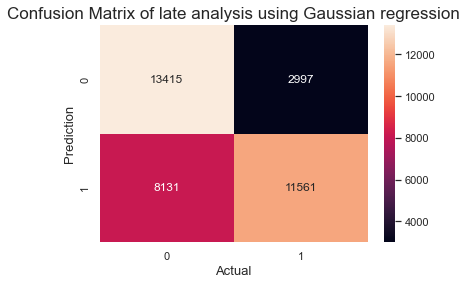

In [93]:
late_y_pred = modell.predict(late_x_test)
 
# compute the confusion matrix
cm = confusion_matrix(late_y_test,late_y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of late analysis using Gaussian regression',fontsize=17)
plt.show()

For Fraud :
1. Logistic - 97%
2. DT - 100%
3. Random Forest -100%
4. Gaussian - 99%

For late :
1. Logistic - 67%
2. DT - 85%
3. Random Forest - 77%
4. Gaussian - 67%
